In [1]:
import pandas

In [20]:
file_path = 'data/usertable20170319.xlsx'
extras = []

In [21]:
xlsx_file = pandas.ExcelFile(file_path)
sheet_name = xlsx_file.sheet_names[0]
data = xlsx_file.parse(sheetname = sheet_name, skiprows = [1])

In [23]:
extract_cols = ['User','Uniq Job Ids','25%','Median','75%','Max']
extract_cols.extend(extras)
data = data[extract_cols]

In [5]:
# filter step (optional)
# data = data['']

In [24]:
ids = ['User','Uniq Job Ids']
ids.extend(extras)
values = ['25%','Median','75%','Max']
data = pandas.melt(data, id_vars=ids, value_vars=values)

In [25]:
quarter = lambda x: int(x/4)
data['Reduced Job Ids'] = data['Uniq Job Ids'].apply(quarter)

In [26]:
split_hour = lambda s: int(s.split(':')[0])
data['Hours'] = data['value'].apply(split_hour)

In [27]:
def bin_times(hr):
    while hr % 6 !=0:
        hr += 1
    if hr > 72:
        hr = 72
    return hr

In [28]:
binner = lambda x: bin_times(x)
data['Bins'] = data['Hours'].apply(binner)

In [11]:
final_cols = ['User','Reduced Job Ids','Bins']
final_cols.extend(extras)
data = data[final_cols]

In [12]:
# concatenate step

In [14]:
group_cols = ['Bins']
grouped_data = data.groupby(group_cols).sum()
grouped_data[group_cols[0]] = grouped_data.index

In [15]:
grouped_data

,Reduced Job Ids,Bins
Bins,,
0,96355,0
6,32368,6
12,3024,12
18,8606,18
24,2877,24
30,2038,30
36,316,36
42,0,42
48,45,48


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
x_vals = grouped_data['Bins'].tolist()[1:]
y_vals = grouped_data['Reduced Job Ids'].tolist()[1:]

In [31]:
print(x_vals)
print(y_vals)

[6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72]
[32368, 3024, 8606, 2877, 2038, 316, 0, 45, 160, 390, 566, 519]


<Container object of 12 artists>

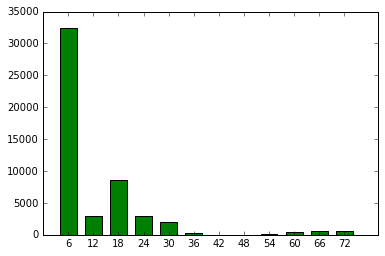

In [32]:
plt.bar(left=x_vals, height=y_vals, width=4, color="green", tick_label=x_vals, align='center')

In [152]:
plt.bar?

In [29]:
data

,User,Uniq Job Ids,variable,value,Reduced Job Ids,Hours,Bins
0,jlange3@chtc.wisc.edu,6092,25%,00:06,1523,0,0
1,tyang29@chtc.wisc.edu,3716,25%,04:25,929,4,6
2,ahspencer@chtc.wisc.edu,7966,25%,02:24,1991,2,6
3,megarcia@chtc.wisc.edu,49424,25%,00:03,12356,0,0
4,clee284@chtc.wisc.edu,1360,25%,58:26,340,58,60
5,adluru@chtc.wisc.edu,24788,25%,00:29,6197,0,0
6,tamorrell@chtc.wisc.edu,1368,25%,07:08,342,7,12
7,snandi@chtc.wisc.edu,27087,25%,00:16,6771,0,0
8,caillol@hep.wisc.edu,7442,25%,00:07,1860,0,0
9,taroni@hep.wisc.edu,3385,25%,01:32,846,1,6
